# **Case Study - Hot Hand**


### Yellow Group 2
##### Group Members: Aman, Nivan Vora, Menji Wei, Gabriel Andaya

The problem centers on investigating the existence of the "hot hand" in basketball, which refers to the idea that a player who has made several successful shots in a row is likely to continue making successful shots, often leading to a streak of "hot" performances. The primary aim of the analysis is to determine whether there is statistical evidence supporting this notion.

The case study is divided into multiple components:

1. Regression Analysis (NBA Salary Prediction):
The task begins by exploring a dataset containing NBA player performance and salary data. The goal is to predict player salaries based on various performance metrics (e.g., Age, Field Goals, Rebounds, Assists, Steals, Blocks, Points) using linear regression models.

2. Hot Hand Hypothesis Testing (NBA Players):
This section focuses on testing the "hot hand" theory using historical basketball data. Hypothesis testing is used to determine if the observed shot success rates significantly differ after a previous hit versus after a miss. This involves setting up null and alternative hypotheses, and using the binomial distribution to perform the test.

3. Streaks Approach (Simulating Runs in Basketball):
The next section extends the hot hand hypothesis by exploring the concept of "streaks" in basketball. A streak is defined as a sequence of consecutive hits or misses. The goal is to compute the expected number of runs (consecutive hits or misses) for each player based on their observed shot probabilities.

4. Data Visualizations and Critical Thinking:
Visualization tools are suggested to explore relationships between performance statistics (e.g., field goal percentage vs. points scored in basketball, or batting average vs. hits in baseball).


In [2]:
#ADDING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## REGRESSION ANALYSIS

In [3]:
#Importing the dataset
nba_data = pd.read_parquet('nba_pgdata.parquet')

HISTOGRAMS

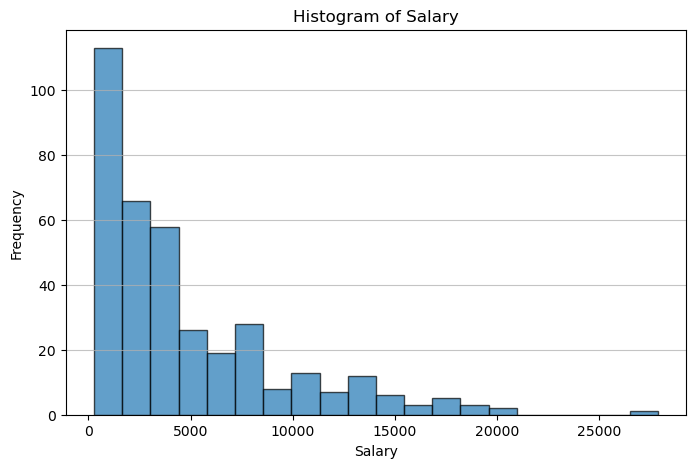

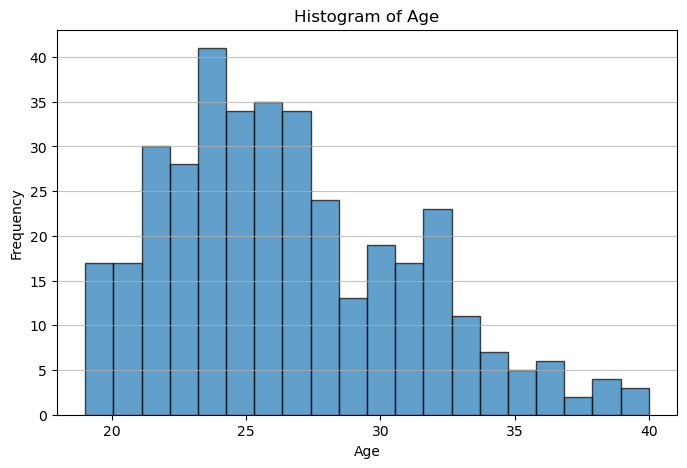

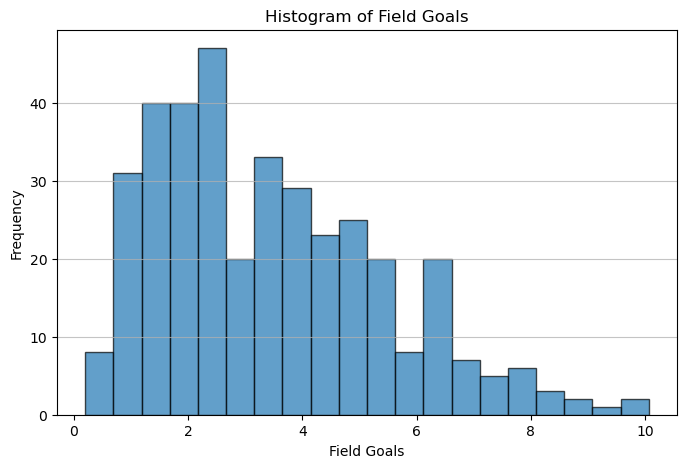

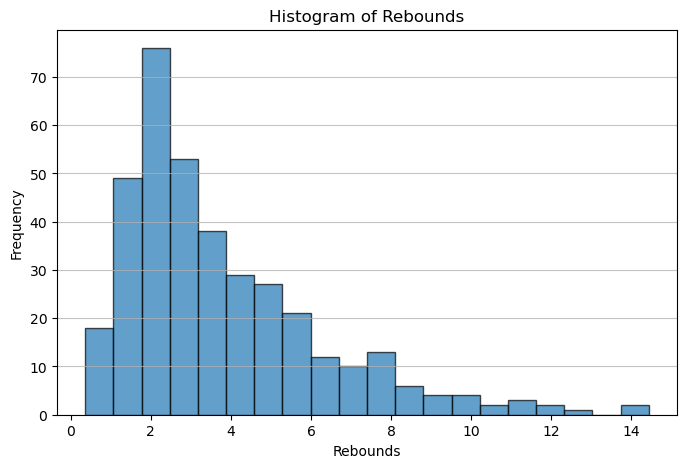

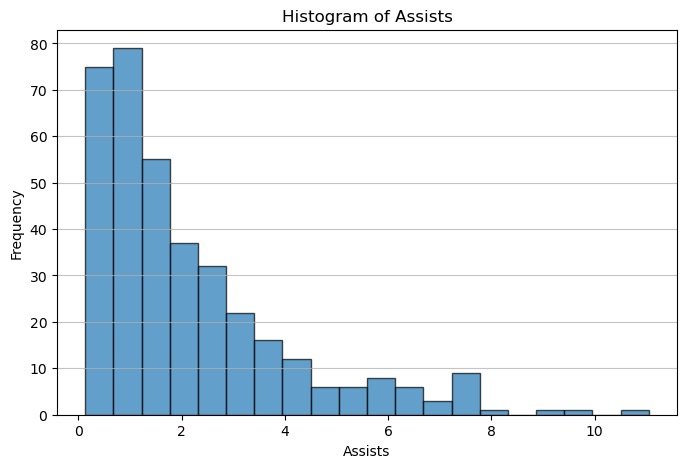

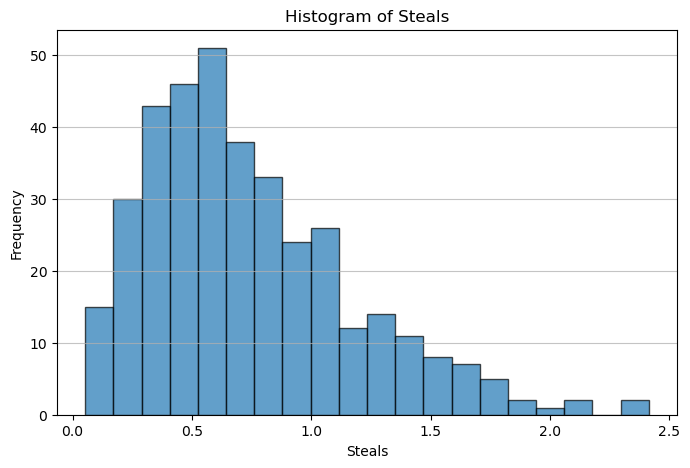

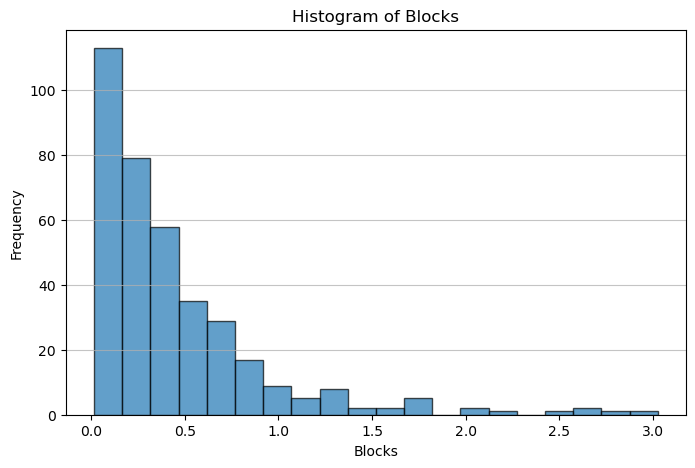

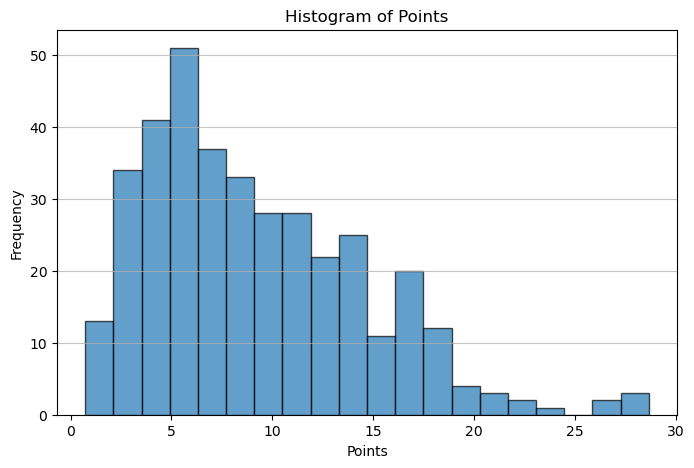

In [4]:
# List of columns to plot histograms for
columns = ["Salary", "Age", "FG", "RB", "AST", "STL", "BLK", "PTS"]
column_labels = {
    "Salary": "Salary",
    "Age": "Age",
    "FG": "Field Goals",
    "RB": "Rebounds",
    "AST": "Assists",
    "STL": "Steals",
    "BLK": "Blocks",
    "PTS": "Points"
}

# Create histograms
for column in columns:
    plt.figure(figsize=(8, 5))
    plt.hist(nba_data[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column_labels[column]}")
    plt.xlabel(column_labels[column])
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()


HISTOGRAM CONCLUSIONS

1.	Salary: Highly right-skewed. Most players earn lower salaries, with a few earning very high salaries.

2.	Age: Approximately symmetric but slightly right-skewed. Most players are in their mid-to-late 20s.

3.	FG (Field Goals per game): Right-skewed. Most players score a few field goals per game, with a few scoring significantly more.

4.	RB (Rebounds per game): Right-skewed. Many players average fewer rebounds, while a smaller number of players have high rebound averages.

5.	AST (Assists per game): Strongly right-skewed. Most players have fewer assists per game, with very few recording high assist averages.

6.	STL (Steals per game): Slightly right-skewed. The majority of players record fewer steals, with only a few having high steal averages.

7.	BLK (Blocks per game): Strongly right-skewed. Most players record very few blocks, with only a small proportion having higher averages.

8.	PTS (Points per game): Right-skewed. Many players score lower points per game, with a few scoring significantly more.



SCATTERPLOTS

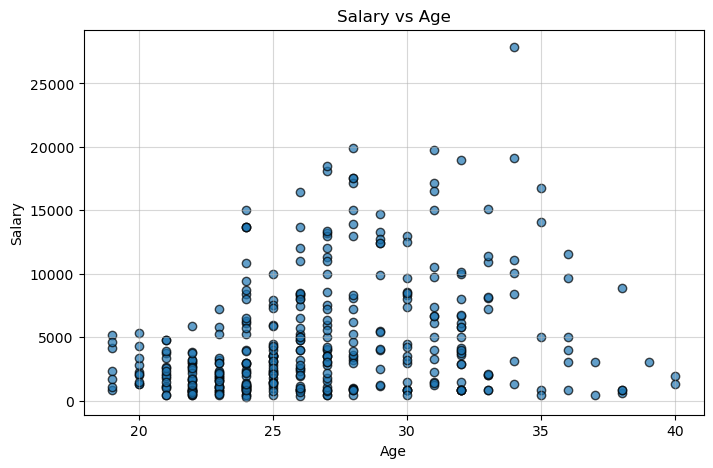

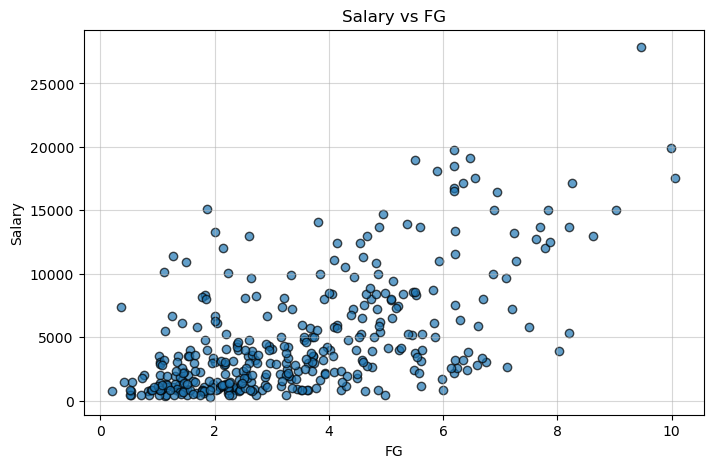

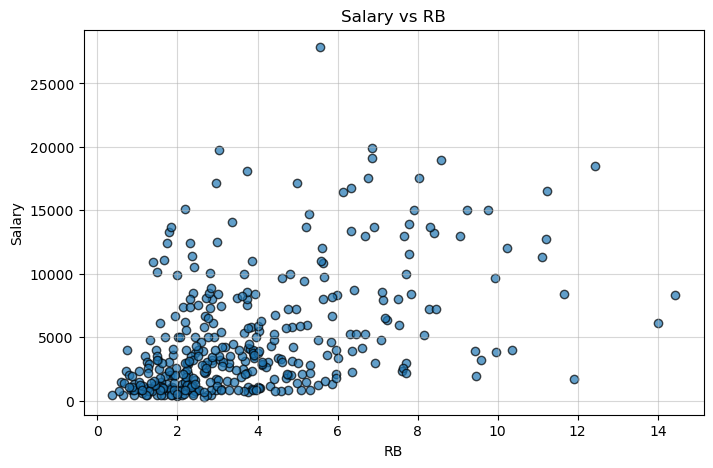

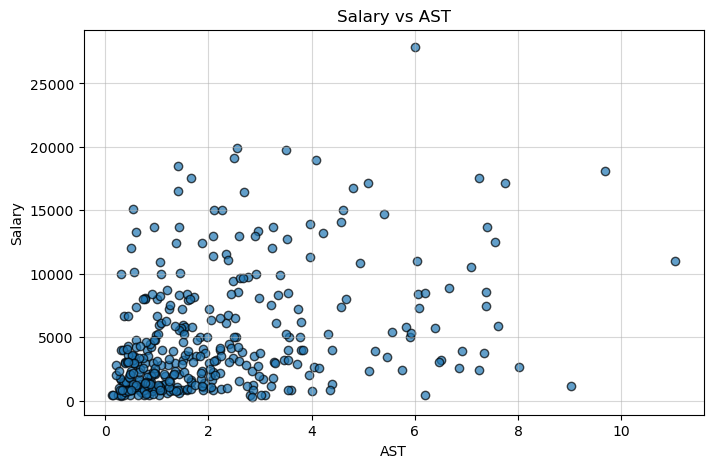

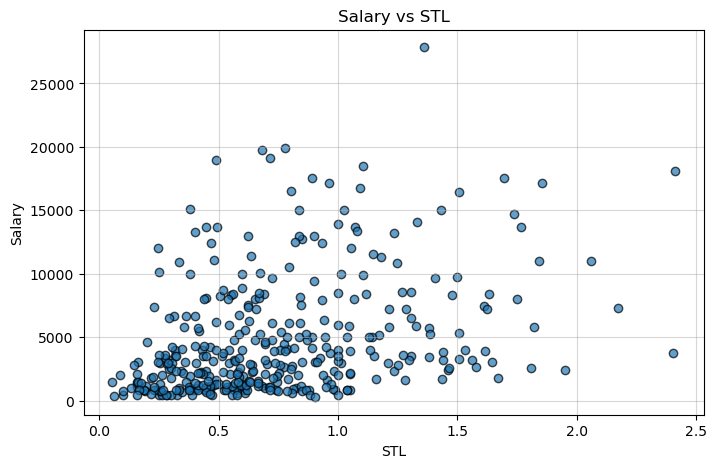

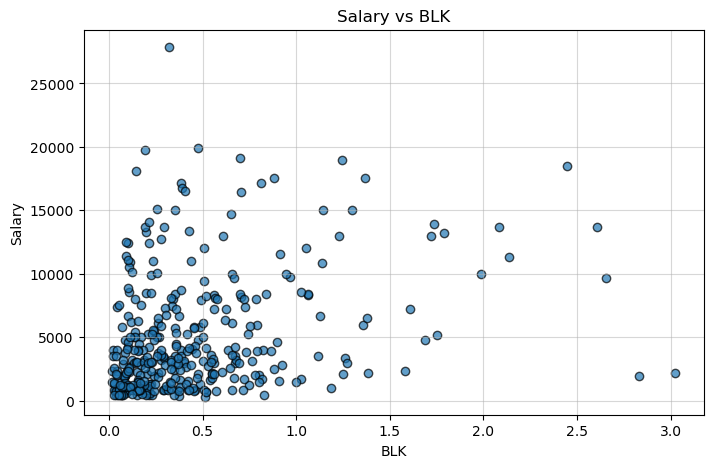

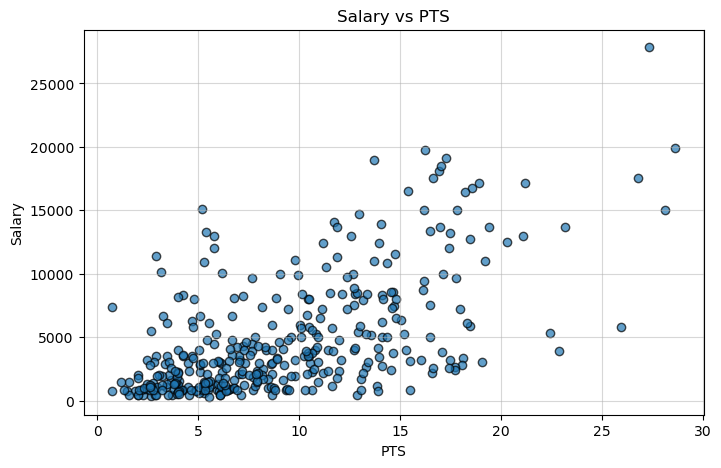

In [7]:
# Create scatterplots of Salary versus each predictor
predictors = ["Age", "FG", "RB", "AST", "STL", "BLK", "PTS"]

for predictor in predictors:
    plt.figure(figsize=(8, 5))
    plt.scatter(nba_data[predictor], nba_data["Salary"], alpha=0.7, edgecolors='k')
    plt.title(f"Salary vs {predictor}")
    column_labels[predictor]
    plt.xlabel(predictor)
    plt.ylabel("Salary")
    plt.grid(alpha=0.5)
    plt.show()

SCATTERPLOT CONCLUSIONS

1. Salary vs. Age:

There doesn't seem to be a strong, simple linear correlation between age and salary.
Younger players tend to have lower salaries, but players in their late 20s to early 30s could have either low or high salaries, indicating that other factors (such as performance, experience, or marketability) are more important than age alone in determining salary. The presence of a few older, high-salary players suggests that age alone is not the best predictor of salary.

2. Salary vs. Field Goals (FG):

There is a weak positive correlation between Field Goals (FG) and Salary, suggesting that players who score more field goals tend to earn higher salaries, but this is not a strong predictor of salary. The scatter shows a wide range of salaries for players with similar or even high numbers of field goals, which indicates that other factors (such as overall team contribution, position, experience, etc.) may play a more significant role in salary determination.

3. Salary vs. Rebounds (RB):

The scatter plot shows a weak positive correlation between Salary and Rebounds. As the number of rebounds (RB) increases, there is a slight trend towards higher salaries. However, the correlation does not appear to be strong, and there is considerable spread in salaries for players with both low and high rebounds. Rebounds have some influence on salary, but other factors might play a more significant role in determining a player’s earnings.

4. Salary vs. Assists (AST):

There seems to be a weak positive correlation between Salary and Assists. As the number of assists increases, salaries tend to increase slightly, but the relationship is not strong. Most players with low assists earn lower salaries, but some players with high assists still earn low salaries, suggesting that assists alone do not heavily determine salary. Similar to rebounds, assists may play a role in determining salary but are not the dominant factor in salary determination.

5. Salary vs. Steals (STL):

The scatter plot for Salary vs. Steals shows a slight positive correlation. Players with more steals tend to have higher salaries, but like the other factors, the relationship is weak. There are many players with low steals who still earn higher salaries. Steals appear to have a mild positive correlation with salary, but like other stats, they are not strong predictors of salary on their own.

6. Salary vs. Blocks (BLK):

There is a weak positive correlation between Salary and Blocks. The trend is somewhat similar to the other stats: players who have more blocks tend to earn higher salaries, but there is a lot of variability in salaries for players with similar block counts.Blocks have a positive but weak correlation with salary. As with the other metrics, they likely contribute to salary, but they are not the sole determinants.

7. Salary vs. Points (PTS):

There is a moderate positive correlation between Points (PTS) and Salary. Scoring more points seems to correlate with higher salaries, but the relationship is not perfect. Other factors, such as overall performance, team dynamics, and experience, likely play a critical role in determining salary, as seen by the wide spread in salaries for similar point-scoring players. Points are an important factor in salary determination but not the sole factor.

REGRESSION A,B,C,D

In [8]:
#REGRESSION A

import statsmodels.api as sm

# Define predictors and the target variable
predictors = ["Age", "FG", "RB", "AST", "STL", "BLK"]
X = nba_data[predictors]
y = nba_data["Salary"]

# Add a constant to the predictors for the regression model
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(y, X).fit()

# Summarize the regression results
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     58.63
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.59e-50
Time:                        19:56:23   Log-Likelihood:                -3517.9
No. Observations:                 370   AIC:                             7050.
Df Residuals:                     363   BIC:                             7077.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8724.6669   1131.833     -7.708      0.000    -1.1e+04   -6498.893
Age          312.0916     39.520      7.897      0.000     234.375     389.808
FG          1156.9816    153.881      7.519      0.000     854.371    1459.593
RB           223.3124    117.004      1.909      0.057      -6.778     453.403
AST          280.4984    146.504      1.915      0.056      -7.605     568.601
STL        -1064.0700    613.248     -1.735      0.084   -2270.035     141.895
BLK         1071.1002    517.030      2.072      0.039      54.350    2087.851
==============================================================================
Omnibus:                       39.865   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.387
Skew:                           0.721   Prob(JB):                     2.10e-13
Kurtosis:                       4.306   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Regression A*

Key Results:
1.	R-squared and Adjusted R-squared:
    R-squared: 0.492
    Adjusted R-squared: 0.484
    Interpretation: About 49.2% of the variation in player salaries is explained by the predictors (Age, FG, RB, AST, STL, and BLK).

2.	Significant Predictors (based on p-values < 0.05):
    Age: p<0.001
    FG (Field Goals): p<0.001
    BLK (Blocks): p=0.039
    Interpretation: These predictors have a statistically significant relationship with Salary.

3.	Non-Significant Predictors:
    RB (Rebounds): p=0.057
    AST (Assists): p=0.056
    STL (Steals): p=0.084
    While these predictors show some correlation, their relationship with Salary is not statistically significant at the 0.05 level.

4.	Estimated Coefficients:
    Age: A one-year increase in age is associated with an increase of $312.09 in salary, holding other factors constant.
    FG: A one-unit increase in field goals per game is associated with an increase of $1,156.98 in salary.
    BLK: A one-unit increase in blocks per game is associated with an increase of $1,071.10 in salary.

5.	Most Impactful Predictor:
    Based on the magnitude of coefficients, FG (Field Goals) has the largest effect on Salary among significant predictors.

6.	Intercept:
    The constant term (−8724.67)suggests that, for a hypothetical player with all predictors set to zero, the salary would be negative, which is not meaningful in this context.

Hypothesis Tests: For each predictor, the null hypothesis is that the coefficient is equal to zero (H0:B=0). Significant predictors reject this null hypothesis, indicating a meaningful relationship with Salary.

R-squared Interpretation: An R-squared of 0.492 indicates the model explains 49.2% of the variation in salaries, which is moderately strong. There may still be other factors influencing salaries that are not included in this model.


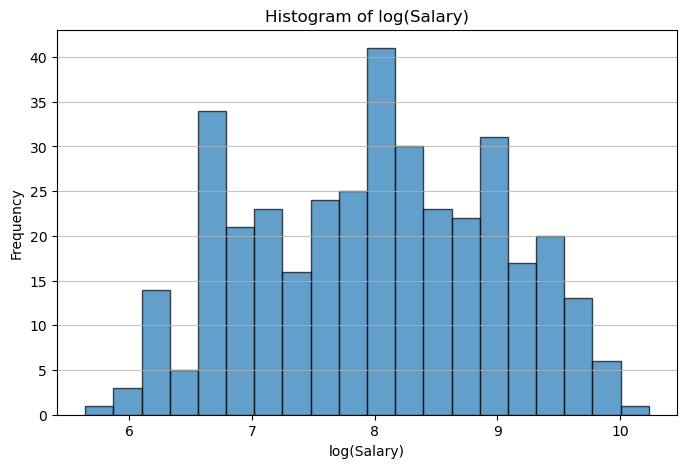

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     50.60
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.35e-45
Time:                        19:56:40   Log-Likelihood:                -410.42
No. Observations:                 370   AIC:                             834.8
Df Residuals:                     363   BIC:                             862.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3022      0.255     20.803      0.000       4.801       5.803
Age            0.0577      0.009      6.487      0.000       0.040       0.075
FG             0.2077      0.035      5.994      0.000       0.140       0.276
RB             0.0667      0.026      2.533      0.012       0.015       0.119
AST            0.0463      0.033      1.403      0.162      -0.019       0.111
STL            0.0017      0.138      0.013      0.990      -0.270       0.273
BLK            0.2104      0.116      1.807      0.072      -0.019       0.439
==============================================================================
Omnibus:                        5.178   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.074
Skew:                          -0.286   Prob(JB):                       0.0791
Kurtosis:                       3.044   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#REGRESSION B

# Create a new variable log_Salary by applying the log transformation
nba_data["log_Salary"] = np.log(nba_data["Salary"])

# Visualize a histogram of log_Salary
plt.figure(figsize=(8, 5))
plt.hist(nba_data["log_Salary"], bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of log(Salary)")
plt.xlabel("log(Salary)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Run the same regression with log_Salary as the response variable
y_log = nba_data["log_Salary"]
model_log = sm.OLS(y_log, X).fit()

# Summarize the regression results
regression_summary_log = model_log.summary()
regression_summary_log

*Regression B*

Key Results:
1.	R-squared and Adjusted R-squared:
    R-squared: 0.455
    Adjusted R-squared: 0.446
    Interpretation: About 45.5% of the variation in log(Salary) is explained by the predictors (Age, FG, RB, AST, STL, BLK).

2.	Significant Predictors (based on p-values < 0.05):
    Age: p<0.001
    FG (Field Goals): p<0.001
    RB (Rebounds): p=0.012
    Interpretation: These predictors have a statistically significant relationship with log (Salary).

3.	Non-Significant Predictors:
    AST (Assists): p=0.162
    STL (Steals): p=0.990
    BLK (Blocks): p=0.072

4.	Estimated Coefficients:
    Age: For a one-year increase in age, the log of salary increases by 0.0577 (approximately a 5.77% increase in salary).
    FG: For a one-unit increase in field goals per game, the log of salary increases by 0.2077 (approximately a 20.77% increase in salary).
    RB: For a one-unit increase in rebounds per game, the log of salary increases by 0.0667 (approximately a 6.67% increase in salary).

5.	Most Impactful Predictor:
    Based on the coefficients, FG (Field Goals) has the largest effect on log(Salary) among the significant predictors.


In [10]:
# REGRESSION C

# Add PTS to the predictors
predictors_with_pts = predictors + ["PTS"]
X_with_pts = nba_data[predictors_with_pts]
X_with_pts = sm.add_constant(X_with_pts)

# Run the regression with log_Salary as the response variable and PTS as an additional predictor
model_with_pts = sm.OLS(y_log, X_with_pts).fit()

# Summarize the regression results
regression_summary_with_pts = model_with_pts.summary()
regression_summary_with_pts

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     45.01
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.23e-45
Time:                        19:57:05   Log-Likelihood:                -407.01
No. Observations:                 370   AIC:                             830.0
Df Residuals:                     362   BIC:                             861.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2968      0.253     20.944      0.000       4.799       5.794
Age            0.0576      0.009      6.524      0.000       0.040       0.075
FG            -0.1171      0.130     -0.901      0.368      -0.373       0.138
RB             0.0828      0.027      3.081      0.002       0.030       0.136
AST            0.0441      0.033      1.347      0.179      -0.020       0.109
STL           -0.0524      0.139     -0.378      0.706      -0.325       0.220
BLK            0.2509      0.117      2.153      0.032       0.022       0.480
PTS            0.1195      0.046      2.592      0.010       0.029       0.210
==============================================================================
Omnibus:                        5.161   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.141
Skew:                          -0.289   Prob(JB):                       0.0765
Kurtosis:                       2.989   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Regression C*

Key Changes:
1.	R-squared and Adjusted R-squared:

    R-squared: 0.465 (increased from 0.455)

    Adjusted R-squared: 0.455 (increased from 0.446)

    Interpretation: Including PTS improves the model slightly, explaining an additional ~1% of the variance in log(Salary).


2.	Significant Predictors (p-values < 0.05):
    
    Age: p<0.001

    RB (Rebounds): p=0.002

    BLK (Blocks): p=0.032

    PTS (Points): p=0.010

    Interpretation: PTS is a significant predictor in this model.


3.	Non-Significant Predictors:

    FG (Field Goals): p=0.368p→ Becomes insignificant with the addition of PTS.

    AST (Assists): p=0.179

    STL (Steals): p=0.706


4.	Estimated Coefficients:

    PTS: For a one-unit increase in points per game, the log of salary increases by 0.1195 (~11.95% increase in salary).

    FG: The coefficient for field goals becomes negative but is not significant.

Interpretation of Changes: Adding PTS to the model absorbs much of the variability that FG (Field Goals) previously explained, rendering it insignificant. This occurs because PTS is highly correlated with FG, leading to multicollinearity. The overall model improves slightly, as seen by the increase in R-squared and the significance of PTS.

Explanation: PTS (Points) is likely a more direct measure of a player's scoring ability and has a stronger association with salary compared to FG (Field Goals). Including PTS in the model provides a better representation of scoring performance, which diminishes the independent contribution of FG.


In [11]:
# REGRESSION D

from sklearn.preprocessing import StandardScaler

# Standardize the predictors and log_Salary
scaler = StandardScaler()
standardized_data = scaler.fit_transform(nba_data[["log_Salary", "Age", "RB", "AST", "STL", "BLK", "PTS"]])
columns = ["log_Salary", "Age", "RB", "AST", "STL", "BLK", "PTS"]
standardized_df = pd.DataFrame(standardized_data, columns=columns)

# Define standardized predictors and response variable
X_standardized = standardized_df[["Age", "RB", "AST", "STL", "BLK", "PTS"]]
y_standardized = standardized_df["log_Salary"]
X_standardized = sm.add_constant(X_standardized)

# Run the regression with standardized data
model_standardized = sm.OLS(y_standardized, X_standardized).fit()

# Summarize the regression results
regression_summary_standardized = model_standardized.summary()
regression_summary_standardized

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     52.41
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.41e-46
Time:                        19:57:17   Log-Likelihood:                -409.58
No. Observations:                 370   AIC:                             833.2
Df Residuals:                     363   BIC:                             860.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.038  -2.17e-15      1.000      -0.076       0.076
Age            0.2537      0.039      6.544      0.000       0.177       0.330
RB             0.1848      0.063      2.953      0.003       0.062       0.308
AST            0.0788      0.062      1.266      0.206      -0.044       0.201
STL           -0.0181      0.060     -0.301      0.763      -0.136       0.100
BLK            0.1105      0.054      2.045      0.042       0.004       0.217
PTS            0.4279      0.066      6.513      0.000       0.299       0.557
==============================================================================
Omnibus:                        5.144   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.078
Skew:                          -0.287   Prob(JB):                       0.0789
Kurtosis:                       3.018   Cond. No.                         3.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Regression D*

Key Results

1.	R-squared and Adjusted R-squared:

    R-squared: 0.464 (same as before, as standardizing does not affect the goodness of fit). Adjusted R-squared: 0.455. Interpretation: About 46.4% of the variance in log(Salary) is explained by the standardized predictors.

2.	Significant Predictors (p-values < 0.05):

    Age: p<0.001p < 0.001, standardized coefficient = 0.2537.

    RB (Rebounds): p=0.003, standardized coefficient = 0.1848.

    BLK (Blocks): p=0.042, standardized coefficient = 0.1105.

    PTS (Points): p<0.001, standardized coefficient = 0.4279.

    Interpretation: PTS has the largest standardized coefficient, indicating it has the strongest influence on log(Salary) when all variables are on the same scale.


3.	Non-Significant Predictors:

    AST (Assists): p=0.206

    STL (Steals): p=0.763


4.	Standardized Coefficients:

    Each coefficient indicates the expected change (in standard deviations) in log(Salary) for a one standard deviation increase in the predictor.
    
    Example: A one standard deviation increase in PTS is associated with a 0.4279 standard deviation increase in log(Salary).


## HYPOTHESIS TESTING

#### Bird’s Eye View: 

1.	If the "hot hand" exists, we would expect P(hit∣1 hit) >= P(hit∣1 miss) for players, as it implies that making the previous shot increases the likelihood of making the next shot.

2.	From the data, P(hit∣1 hit) is not consistently higher than P(hit∣1 miss). In some cases, it is equal or even lower.

3.	From the data we can say that Player B and Player C have a hot hand as for both the players P(hit|1 hit) >= P(hit|1 miss)

We will perform a paired t-test on the difference between 𝑃(hit ∣ 1 hit) and 𝑃(hit ∣ 1 miss) for each player. We will test the hypothesis that the average difference across all players is greater than zero (i.e., players are more likely to make a shot after a hit than after a miss).

#### Statistical Test:

1. Null Hypothesis(Ho): The average difference P(hit∣1 hit) - P(hit∣1 miss) across all players is 0. This implies there is no "hot hand" effect on average across players.

2.	Alternate Hypothesis(Ha): The average difference P(hit∣1 hit)−P(hit∣1 miss) across all players is greater than 0. This implies that there is evidence of a "hot hand" effect on average across players.



In [17]:
from scipy.stats import ttest_1samp

# Define the conditional probabilities for each player
p_hit_given_miss = [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71]
p_hit_given_hit = [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]

# Calculate the differences for each player
differences = [p_hit_given_hit[i] - p_hit_given_miss[i] for i in range(len(p_hit_given_miss))]

# Perform a one-sample t-test to test if the mean difference is significantly different from 0
t_stat, p_value = ttest_1samp(differences, 0)

# Calculate mean and standard deviation of the differences
mean_difference = sum(differences) / len(differences)
std_difference = (sum((x - mean_difference)**2 for x in differences) / (len(differences) - 1))**0.5

# Print summary of results
print(f"Test Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Mean Difference: {mean_difference:.4f}")
print(f"Standard Deviation of Differences: {std_difference:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is evidence for the hot hand!")
else:
    print("We fail to reject the null hypothesis. There is no evidence for the hot hand.")

Test Statistic: -2.7343
P-value: 0.0257
Mean Difference: -0.0444
Standard Deviation of Differences: 0.0488
We reject the null hypothesis. There is evidence for the hot hand!


#### Conclusion:
The p-value (p=0.026) is less than 0.05
Therefore, we reject the null hypothesis (H0) and conclude that there is evidence for the hot hand (i.e., players are more likely to hit after a successful shot than after a miss).
 
	
#### Interpretation: 

The mean difference is negative, implying that players, on average, are slightly less likely to hit after a successful shot than after a miss. This test checks the statistical significance of the "hot hand" hypothesis by comparing the likelihood of making a shot after hitting vs. missing. The test evaluates whether the observed differences across players are likely to be due to chance or whether there's a consistent trend that could suggest the existence of the hot hand.


#### Streaks Approach

In [13]:
import numpy as np
from scipy.stats import norm
import pandas as pd
# Start with simulation
# Function to simulate runs and compute expected values
def simulate_runs(p_hit, num_shots, num_simulations=10000):
    # Simulate all sequences at once
    sequences = np.random.binomial(1, p_hit, (num_simulations, num_shots))  # Matrix of simulations

    # Compute differences between consecutive shots for all simulations
    differences = np.diff(sequences, axis=1)

    # Count runs for all simulations (transitions + 1 for the first run)
    run_counts = np.sum(differences != 0, axis=1) + 1

    # Compute expected number of runs and standard deviation
    expected_runs = np.mean(run_counts)
    std_dev_runs = np.std(run_counts)
    return expected_runs, std_dev_runs


In [14]:
# Function to perform hypothesis testing
def hypothesis_test(observed_runs, expected_runs, std_dev_runs, alpha=0.05):
    # Compute z-score
    z_score = (observed_runs - expected_runs) / std_dev_runs
    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    # Determine result
    if p_value < alpha:
        if z_score < 0:
            conclusion = "Reject null: Evidence of streakiness (hot hand)."
        else:
            conclusion = "Reject null: Evidence of alternation (frequent switching)."
    else:
        conclusion = "Fail to reject null: No evidence of streakiness or alternation."
    return z_score, p_value, conclusion

In [15]:
# Driver function to process all players
def analyze_players(players_data):
    results = []
    for player, data in players_data.items():
        # Simulate to get expected runs and standard deviation
        expected_runs, std_dev_runs = simulate_runs(data["p_hit"], data["num_shots"])
        # Perform hypothesis testing
        z_score, p_value, conclusion = hypothesis_test(data["actual_runs"], expected_runs, std_dev_runs)
        # Collect results
        results.append({
            "Player": player,
            "Observed Runs": data["actual_runs"],
            "Expected Runs": expected_runs,
            "Std Dev Runs": std_dev_runs,
            "Z-Score": z_score,
            "P-Value": p_value,
            "Conclusion": conclusion
        })
    return results

In [17]:
# Player data from the table
players_data = {
    "Player A": {"p_hit": 0.50, "num_shots": 248, "actual_runs": 128},
    "Player B": {"p_hit": 0.52, "num_shots": 884, "actual_runs": 431},
    "Player C": {"p_hit": 0.46, "num_shots": 419, "actual_runs": 203},
    "Player D": {"p_hit": 0.56, "num_shots": 339, "actual_runs": 172},
    "Player E": {"p_hit": 0.47, "num_shots": 272, "actual_runs": 134},
    "Player F": {"p_hit": 0.46, "num_shots": 451, "actual_runs": 245},
    "Player G": {"p_hit": 0.54, "num_shots": 433, "actual_runs": 227},
    "Player H": {"p_hit": 0.52, "num_shots": 351, "actual_runs": 176},
    "Player I": {"p_hit": 0.62, "num_shots": 403, "actual_runs": 220},
}

# Run the analysis
results = analyze_players(players_data)

# Convert the results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results

print("Hot Hand Hypothesis Test Results for Players")
print(results_df)

Hot Hand Hypothesis Test Results for Players
     Player  Observed Runs  Expected Runs  Std Dev Runs   Z-Score   P-Value  \
0  Player A            128       124.4899      7.874497  0.445755  0.655774   
1  Player B            431       441.7551     14.801930 -0.726601  0.467470   
2  Player C            203       208.6108     10.175879 -0.551382  0.581372   
3  Player D            172       167.5115      9.305357  0.482357  0.629553   
4  Player E            134       136.0142      8.227490 -0.244813  0.806601   
5  Player F            245       224.6057     10.665094  1.912248  0.055844   
6  Player G            227       215.8181     10.482243  1.066747  0.286086   
7  Player H            176       175.7141      9.549867  0.029938  0.976117   
8  Player I            220       190.4276     10.407745  2.841384  0.004492   

                                          Conclusion  
0  Fail to reject null: No evidence of streakines...  
1  Fail to reject null: No evidence of streakines...  

#### Interpretation:

**Player A:**

Observed Runs: 128

Expected Runs: ~124.5

Z-Score: 0.45

P-Value: 0.656

Conclusion: Fail to reject the null hypothesis. There is no significant evidence to suggest streakiness or alternation in Player A's performance.

**Player B:**

Observed Runs: 431

Expected Runs: ~441.8

Z-Score: -0.73

P-Value: 0.467

Conclusion: Fail to reject the null hypothesis. Player B's observed runs are consistent with random performance.

**Player C:**

Observed Runs: 203

Expected Runs: ~208.6

Z-Score: -0.55

P-Value: 0.581

Conclusion: Fail to reject the null hypothesis. Player C's runs are consistent with randomness.

**Player D:**

Observed Runs: 172

Expected Runs: ~167.5

Z-Score: 0.48

P-Value: 0.629

Conclusion: Fail to reject the null hypothesis. No evidence of streakiness or alternation.

**Player E:**

Observed Runs: 134

Expected Runs: ~136.6

Z-Score: -0.24

P-Value: 0.806

Conclusion: Fail to reject the null hypothesis. No evidence of streakiness or alternation.

**Player F:**

Observed Runs: 245

Expected Runs: ~224.6

Z-Score: 1.91

P-Value: 0.055

Conclusion: Fail to reject the null hypothesis at the 0.05 level. However, borderline evidence suggests potential alternation (frequent switching).

**Player G:**

Observed Runs: 227

Expected Runs: ~215.8

Z-Score: 1.07

P-Value: 0.286

Conclusion: Fail to reject the null hypothesis. No evidence of streakiness or alternation.

**Player H:**

Observed Runs: 176

Expected Runs: ~175.7

Z-Score: 0.01

P-Value: 0.976

Conclusion: Fail to reject the null hypothesis. Observed runs are extremely close to expected runs, consistent with random performance.

**Player I:**

Observed Runs: 220

Expected Runs: ~190.4

Z-Score: 2.84

P-Value: 0.004

Conclusion: Reject the null hypothesis. Evidence suggests alternation (frequent switching), inconsistent with random performance.

#### Conclusion:

Fail to Reject the Null (Most Players):

For most players, the observed runs do not significantly deviate from the expected runs under the random shooting model.

This suggests that their performance does not exhibit streakiness (hot hand) or unusual alternation.

**Player I:**

The null hypothesis is rejected for Player I, with evidence of alternation (frequent switching between hits and misses). This suggests Player I's performance may not follow the random shooting model.

**Player F:**

While the null hypothesis is not rejected, borderline evidence (
𝑃
≈
0.055
P≈0.055) suggests Player F might exhibit alternation, though this is not conclusive at the standard 0.05 level.